# STEP1. 시계열 데이터 준비

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

데이터 불러오기(Time Series 생성)

In [123]:
# 1. 노드 데이터
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close'] # 종가

ts.head()

Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

In [266]:
# 2. 다른 종목 google
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/GOOG.csv'
df2 = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts2 = df2['Close'] # 종가

ts2.head()

Date
2020-09-08    1532.390015
2020-09-09    1556.959961
2020-09-10    1532.020020
2020-09-11    1520.719971
2020-09-14    1519.280029
Name: Close, dtype: float64

In [240]:
# 3. 다른 종목 Softbank
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/9984.T.csv'
df3 = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts3 = df3['Close'] # 종가

ts3.head()

Date
2020-09-07    5881.0
2020-09-08    5845.0
2020-09-09    5677.0
2020-09-10    5800.0
2020-09-11    5860.0
Name: Close, dtype: float64

# STEP2. 전처리

결측치 확인

In [82]:
# 1. 노드 데이터
ts = ts.interpolate(method='time')
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

In [108]:
# 2. 구글
ts2 = ts2.interpolate(method='time')
ts2[ts2.isna()]

Series([], Name: Close, dtype: float64)

In [162]:
# 3. 소프트뱅크
ts3 = ts3.interpolate(method='time')
ts3[ts3.isna()]

Series([], Name: Close, dtype: float64)

시각화

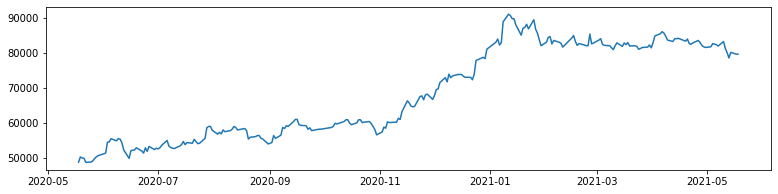

In [83]:
# 1. 노드 데이터
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 3 
plt.plot(ts)

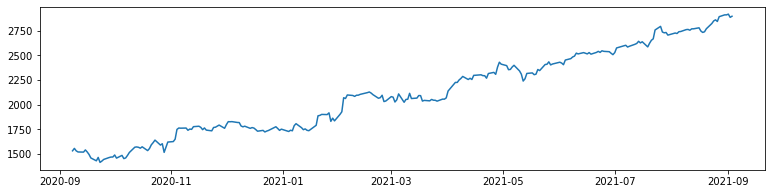

In [109]:
# 2. 구글
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 3 
plt.plot(ts2)

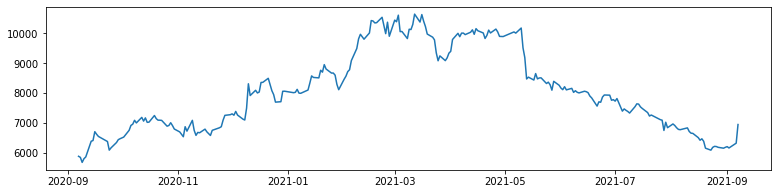

In [163]:
# 3. 소프트뱅크
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 3 
plt.plot(ts3)

Stationay하게 만들기
- 로그함수 변환

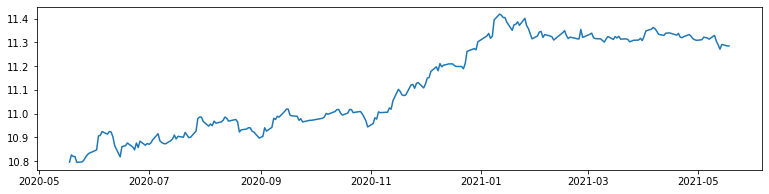

In [124]:
# 1. 노드 데이터
rcParams['figure.figsize'] = 13, 3
ts_log = np.log(ts)
plt.plot(ts_log)

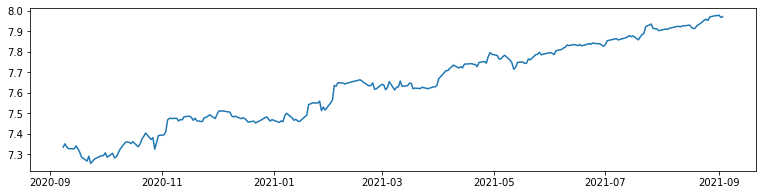

In [267]:
# 2. 구글
rcParams['figure.figsize'] = 13, 3
ts2_log = np.log(ts2)
plt.plot(ts2_log)

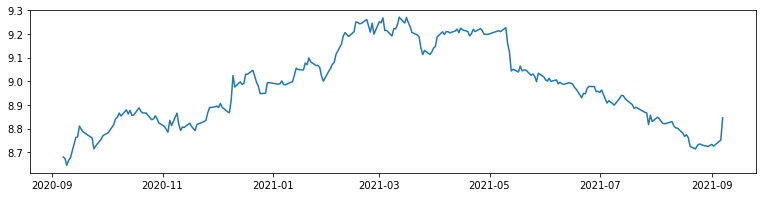

In [241]:
# 3. 소프트뱅크
rcParams['figure.figsize'] = 13, 3
ts3_log = np.log(ts3)
plt.plot(ts3_log)

# STEP 3. 시계열 안정성 분석

- 정성적 그래프 분석

In [85]:
def plot_rolling_statistics(timeseries, window=12):
    
    # 원본시계열(orig), 이동평균(mean), 이동표준편차(std)
    
    rolmean = timeseries.rolling(window=window).mean()  
    rolstd = timeseries.rolling(window=window).std()    

    orig = plt.plot(timeseries, color='black',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='blue', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)

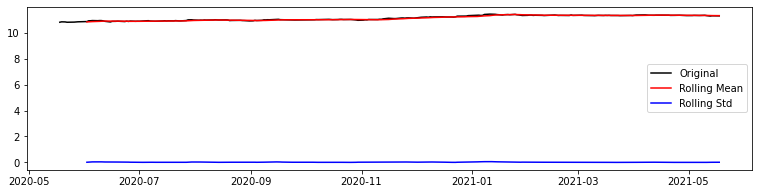

In [86]:
# 1. 노드 데이터
plt.rcParams["figure.figsize"] = (13,3)
plot_rolling_statistics(ts_log, window=12)

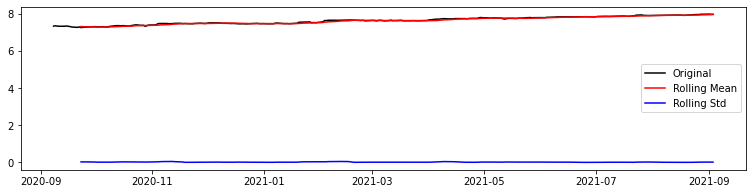

In [111]:
# 2. 구글
plt.rcParams["figure.figsize"] = (13,3)
plot_rolling_statistics(ts2_log, window=12)

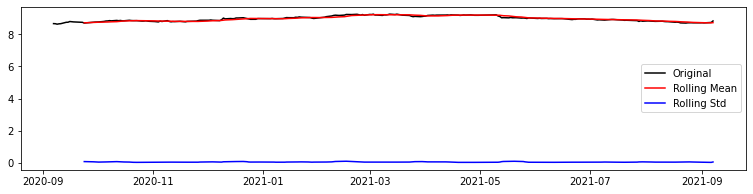

In [165]:
# 3. 소프트뱅크
plt.rcParams["figure.figsize"] = (13,3)
plot_rolling_statistics(ts3_log, window=12)

- 정량적 분석 Augmented Dickey-Fuller Test

In [87]:
# statsmodels 패키지 : 통계 패키지
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지_ adfuller 메소드
    dftest = adfuller(timeseries, autolag='AIC')  
    
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

- p-value가 0에 가까우면 귀무가설은 기각, 대립가설 채택
- p-value가 1에 가까우면 귀무가설을 채택

- 귀무가설 : 해당 시계열이 안정적이지 않다.
- 대립가설 : 해당 시계열이 안정적이다.

In [88]:
# 1. 노드 데이터

augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


==> ts_log 시계열이 안정적이지 않다는 귀무가설은 p-value가 0.59로 나왔으므로 안정적이지 않다는 쪽으로 조금 치우쳤으나, 정답을 알 수 없음.

In [112]:
# 2. 구글
augmented_dickey_fuller_test(ts2_log)

Results of Dickey-Fuller Test:
Test Statistic                  -0.460093
p-value                          0.899572
#Lags Used                       7.000000
Number of Observations Used    243.000000
Critical Value (1%)             -3.457551
Critical Value (5%)             -2.873509
Critical Value (10%)            -2.573148
dtype: float64


==> ts2_log 시계열이 안정적이지 않다는 귀무가설은 p-value가 0.899572로 나왔으므로 안정적이지 않다는 쪽으로 치우쳤다.

In [242]:
# 3. 소프트뱅크
augmented_dickey_fuller_test(ts3_log)

Results of Dickey-Fuller Test:
Test Statistic                  -2.111215
p-value                          0.240029
#Lags Used                       2.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64


==> ts3_log 시계열이 안정적이지 않다는 귀무가설은 p-value가 0.240029로 나왔으므로 안정적이라는 대립가설이 채택된다.

- 시계열 분해 (Time Series Decomposition)

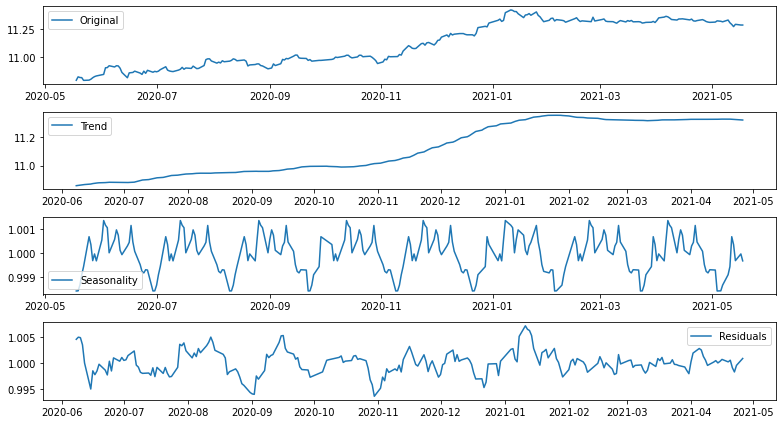

In [89]:
# 1. 노드 데이터

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30)

trend = decomposition.trend # 평균값 변화
seasonal = decomposition.seasonal # 계절성 변화
residual = decomposition.resid # 원본(로그변환한) - 추세(trend) - 계절성(seasonality)

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

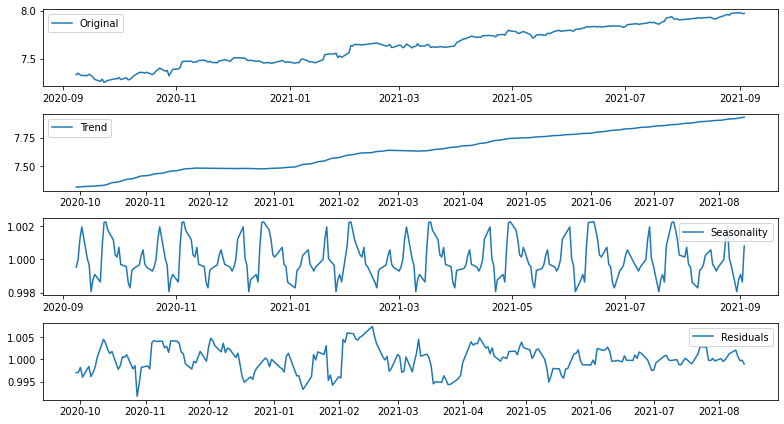

In [134]:
# 2. 구글

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts2_log, model='multiplicative', period = 30)

trend = decomposition.trend # 평균값 변화
seasonal = decomposition.seasonal # 계절성 변화
residual = decomposition.resid # 원본(로그변환한) - 추세(trend) - 계절성(seasonality)

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts2_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

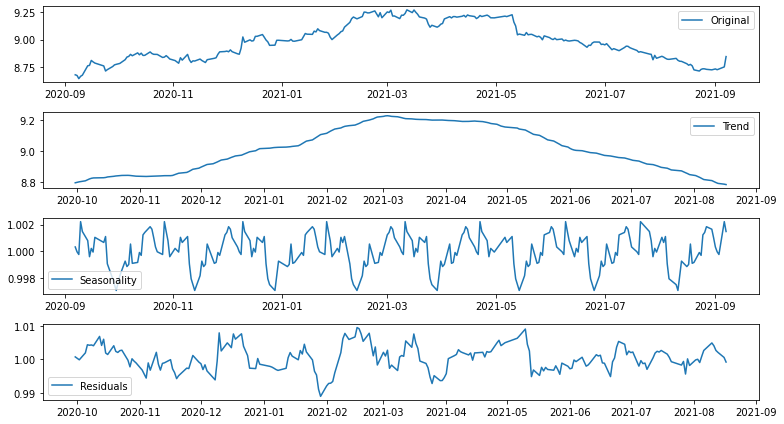

In [192]:
# 3. 소프트뱅크

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts3_log, model='multiplicative', period = 30)

trend = decomposition.trend # 평균값 변화
seasonal = decomposition.seasonal # 계절성 변화
residual = decomposition.resid # 원본(로그변환한) - 추세(trend) - 계절성(seasonality)

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts3_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

- Residual 안정성 여부

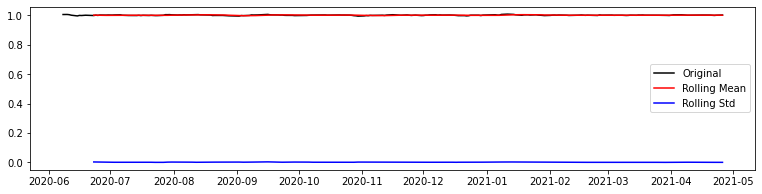

In [90]:
# 1. 노드 데이터

plt.rcParams["figure.figsize"] = (13,3)
plot_rolling_statistics(residual)

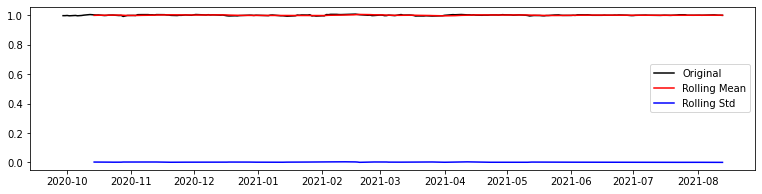

In [114]:
# 2. 구글

plt.rcParams["figure.figsize"] = (13,3)
plot_rolling_statistics(residual)

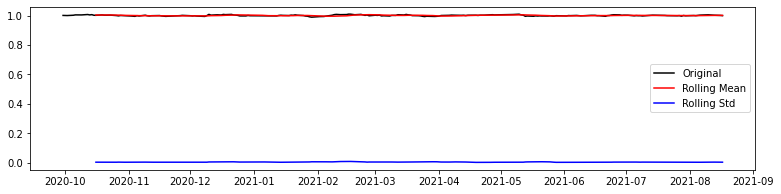

In [193]:
# 3. 소프트뱅크

plt.rcParams["figure.figsize"] = (13,3)
plot_rolling_statistics(residual)

In [91]:
# 1. 노드 데이터

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


1.0e-08 means to multiply the vector by 0.00000001

==> p-value 엄청 작게 나옴, 해당 시계열이 안정적이게 변함.

In [135]:
# 2. 구글

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -2.754986
p-value                          0.064997
#Lags Used                      15.000000
Number of Observations Used    205.000000
Critical Value (1%)             -3.462658
Critical Value (5%)             -2.875744
Critical Value (10%)            -2.574341
dtype: float64


==> p-value 0.064997 나옴, 해당 시계열이 안정적이게 변함.

In [169]:
# 3. 소프트뱅크

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -5.853679e+00
p-value                        3.540779e-07
#Lags Used                     5.000000e+00
Number of Observations Used    2.090000e+02
Critical Value (1%)           -3.462032e+00
Critical Value (5%)           -2.875471e+00
Critical Value (10%)          -2.574195e+00
dtype: float64


==> p-value 3.540779e-07 나옴, 안정적임

# STEP4. 학습, 테스트 데이터셋 생성

학습 9 : 테스트 1

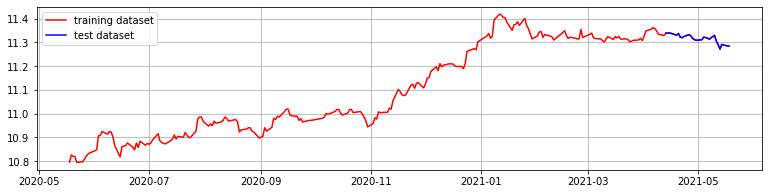

In [125]:
# 1. 노드 데이터

# 테이터 분할
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]

# 그래프 옵션
plt.figure(figsize=(13,3))
plt.grid(True)

# 그래프
plt.plot(ts_log, c='r', label='training dataset')  
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

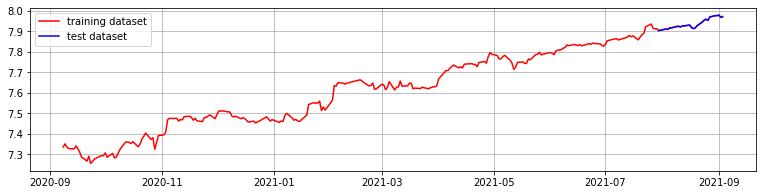

In [268]:
# 2. 구글

# 테이터 분할
train_data, test_data = ts2_log[:int(len(ts2_log)*0.9)], ts2_log[int(len(ts2_log)*0.9):]

# 그래프 옵션
plt.figure(figsize=(13,3))
plt.grid(True)

# 그래프
plt.plot(ts2_log, c='r', label='training dataset')  
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

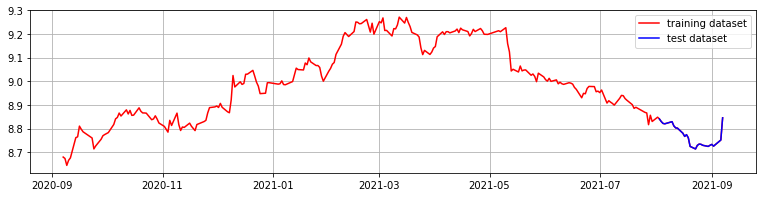

In [243]:
# 3. 소프트뱅크

# 테이터 분할
train_data, test_data = ts3_log[:int(len(ts3_log)*0.9)], ts3_log[int(len(ts3_log)*0.9):]

# 그래프 옵션
plt.figure(figsize=(13,3))
plt.grid(True)

# 그래프
plt.plot(ts3_log, c='r', label='training dataset')  
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [93]:
# 1. 노드 데이터

# 데이터 모양 확인
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2020-05-18    10.795486
2020-05-19    10.825760
Name: Close, dtype: float64
(225,)
(25,)


In [117]:
# 2. 구글

print(ts2_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2020-09-08    7.334584
2020-09-09    7.350490
Name: Close, dtype: float64
(225,)
(26,)


In [171]:
# 3. 소프트뱅크

print(ts3_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2020-09-07    8.679482
2020-09-08    8.673342
Name: Close, dtype: float64
(225,)
(25,)


# STEP5. 적정 ARIMA 모수 찾기

ARIMA(Autoregressive Integrated Moving Average)

시계열 해당 부분
- AR : Residual
- MA : Trend
- I : Seanoality

ARIMA 모수
- p : AR의 시차
- q : MA의 시차
- d : I의 횟수

모수 결정 가이드 라인
- p + q < 2, p * q = 0 
- p 나 q 중 하나는 0

[ACF(Autocorrelation Function)]
- ACF plot에서 X 축은 상관 계수, y축은 시차 수
- 시계열 현재 값과 과거 값의 상관 관계 설명

[PACF(Partial Autocorrelation Function)]
- 다른 관측치의 영향력 배제
- 두 시차의 특정 관측치 간 관련성 측정

1) ACF, PACF 그려보고 p와 q (시차)구하기

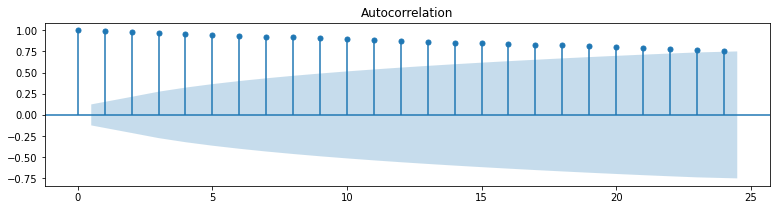

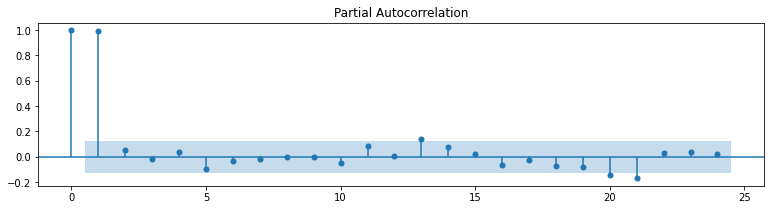

In [94]:
# 1. 노드 데이터
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # MA 모델의 시차 q # x축은 상관계수, y축은 시차수
plot_pacf(ts_log) # AR 모델의 시차 p
plt.show()

- PACF 그래프에서 p=1 (pacf가 0이라는 것은 현재 데이터와 p시점 떨어진 이전 데이터와 상관관계가 없다는 의미)
- ACF 그래프에서 q=0 (점차적으로 감소하는 양상으로, 적합한 값이 없다고 하여 q=0으로 함)

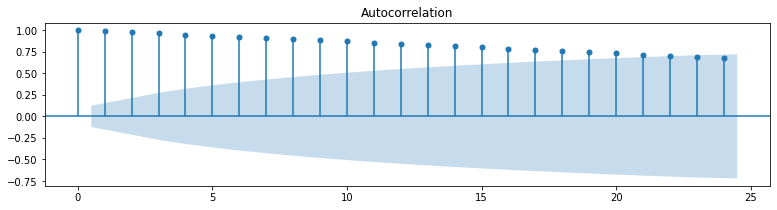

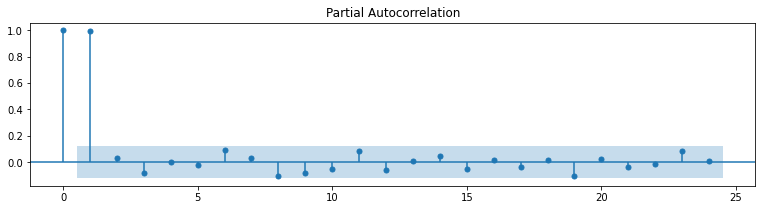

In [118]:
# 2. 구글

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts2_log)   # MA 모델의 시차 q # x축은 상관계수, y축은 시차수
plot_pacf(ts2_log) # AR 모델의 시차 p
plt.show()

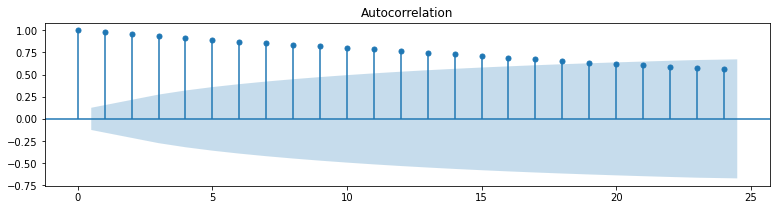

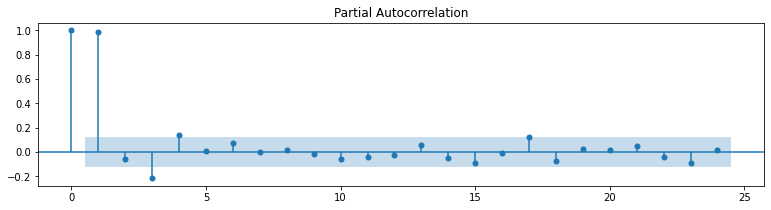

In [229]:
# 3. 소프트뱅크

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts3_log)   # MA 모델의 시차 q # x축은 상관계수, y축은 시차수
plot_pacf(ts3_log) # AR 모델의 시차 p
plt.show()

2) 차분 안정성 확인하고 d 구하기

Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


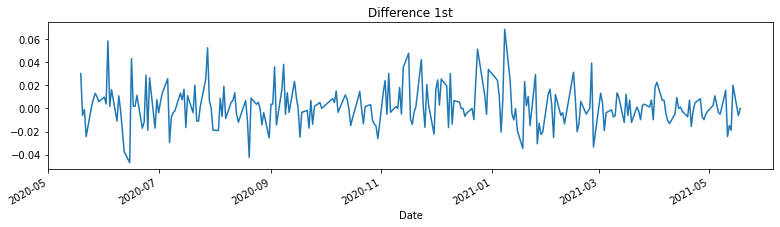

In [126]:
# 1. 노드 데이터
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.029320e+01
p-value                        3.525823e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


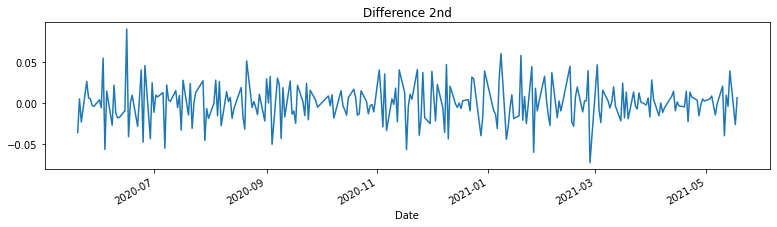

In [77]:
# 1. 노드 데이터
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

==> 안정 상태이므로 d는 1로 하기, 2차 차분 상태가 더 안정되긴 하므로 2로도 해 보기
- q와 d 값을 바꿔보면서 최적값을 찾는 시도를 해 보면 좋을 것.

Results of Dickey-Fuller Test:
Test Statistic                -6.586295e+00
p-value                        7.300537e-09
#Lags Used                     6.000000e+00
Number of Observations Used    2.430000e+02
Critical Value (1%)           -3.457551e+00
Critical Value (5%)           -2.873509e+00
Critical Value (10%)          -2.573148e+00
dtype: float64


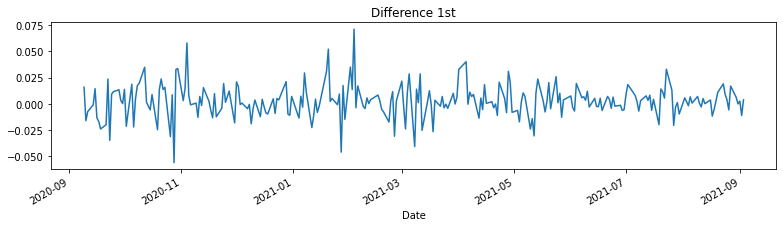

In [269]:
# 2. 구글
# 1차 차분 구하기
diff_1 = ts2_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -6.930959e+00
p-value                        1.084448e-09
#Lags Used                     1.600000e+01
Number of Observations Used    2.320000e+02
Critical Value (1%)           -3.458855e+00
Critical Value (5%)           -2.874080e+00
Critical Value (10%)          -2.573453e+00
dtype: float64


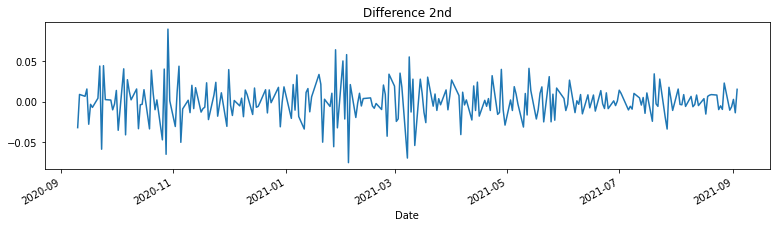

In [270]:
# 2. 구글
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

==> 안정 상태이므로 d는 1로 하기, 2차 차분 상태가 더 안정되긴 하므로 2로도 해 보기

Results of Dickey-Fuller Test:
Test Statistic                -8.486659e+00
p-value                        1.347591e-13
#Lags Used                     2.000000e+00
Number of Observations Used    2.410000e+02
Critical Value (1%)           -3.457779e+00
Critical Value (5%)           -2.873609e+00
Critical Value (10%)          -2.573202e+00
dtype: float64


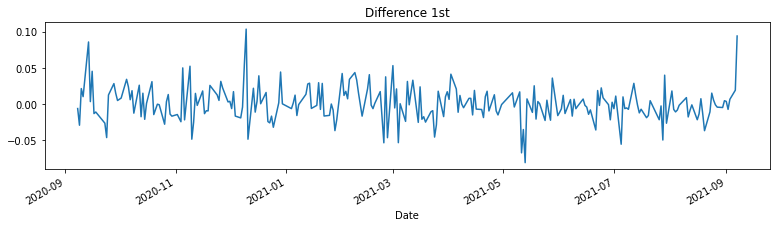

In [244]:
# 3. 소프트뱅크
# 1차 차분 구하기
diff_1 = ts3_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

==> 안정 상태이므로 d는 1로 하기

# STEP6. ARIMA 모델 훈련과 테스트

1) 모델 빌드 및 훈련

In [127]:
# 1. 노드 데이터
from statsmodels.tsa.arima_model import ARIMA

# ARIMA MODEL 생성
model = ARIMA(train_data, order=(1, 1, 0))  #p, d, q 순서
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  224
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 585.396
Method:                       css-mle   S.D. of innovations              0.018
Date:                Tue, 07 Sep 2021   AIC                          -1164.792
Time:                        10:41:25   BIC                          -1154.557
Sample:                             1   HQIC                         -1160.661
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0024      0.001      1.978      0.048    2.17e-05       0.005
ar.L1.D.Close     0.0168      0.067      0.250      0.803      -0.115       0.148
                                    Root

In [289]:
# 2. 구글
from statsmodels.tsa.arima_model import ARIMA

# ARIMA MODEL 생성
model2 = ARIMA(train_data, order=(1, 1, 6))  #p, d, q 순서
fitted_m2 = model2.fit(disp=-1)  
print(fitted_m2.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  224
Model:                 ARIMA(1, 1, 6)   Log Likelihood                 612.741
Method:                       css-mle   S.D. of innovations              0.016
Date:                Tue, 07 Sep 2021   AIC                          -1207.482
Time:                        12:02:59   BIC                          -1176.777
Sample:                             1   HQIC                         -1195.088
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0026      0.001      3.332      0.001       0.001       0.004
ar.L1.D.Close    -0.6954      0.368     -1.890      0.059      -1.416       0.026
ma.L1.D.Close     0.6573      0.367     

In [263]:
# 3. 소프트뱅크
from statsmodels.tsa.arima_model import ARIMA

# ARIMA MODEL 생성
model3 = ARIMA(train_data, order=(1, 1, 4))  #p, d, q 순서
fitted_m3 = model3.fit(disp=-1)  
print(fitted_m3.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  219
Model:                 ARIMA(1, 1, 4)   Log Likelihood                 508.668
Method:                       css-mle   S.D. of innovations              0.024
Date:                Tue, 07 Sep 2021   AIC                          -1003.337
Time:                        11:56:52   BIC                           -979.613
Sample:                             1   HQIC                          -993.756
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0007      0.002      0.424      0.672      -0.003       0.004
ar.L1.D.Close    -0.4675      1.262     -0.370      0.711      -2.941       2.006
ma.L1.D.Close     0.4456      1.264     

2) 예측

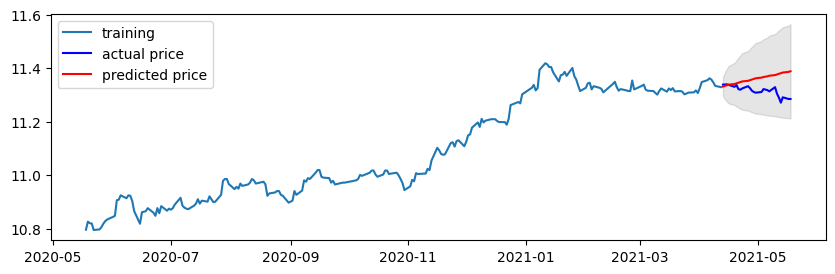

In [128]:
# 1. 노드 데이터
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 상한 바운드

plt.figure(figsize=(10,3), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()

plt.show()

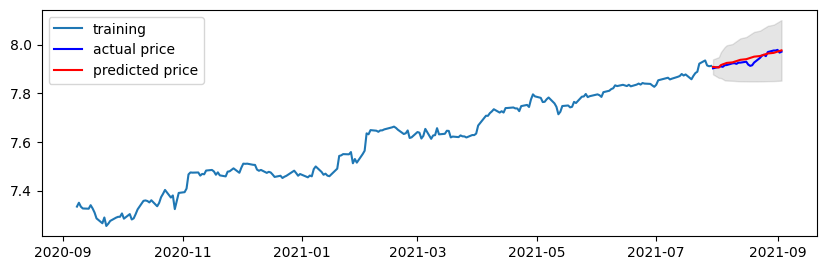

In [290]:
# 2. 구글
fc, se, conf = fitted_m2.forecast(len(test_data), alpha=0.05)  # 95% conf

fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 상한 바운드

plt.figure(figsize=(10,3), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()

plt.show()

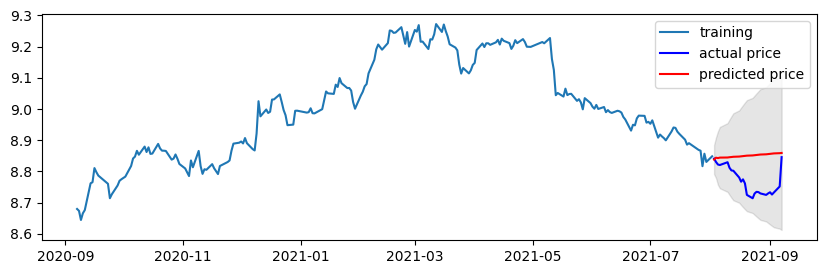

In [264]:
# 3. 소프트뱅크
fc, se, conf = fitted_m3.forecast(len(test_data), alpha=0.05)  # 95% conf

fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 상한 바운드

plt.figure(figsize=(10,3), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()

plt.show()

3) 정확도 측정 (오차 계산)

In [129]:
# 1. 노드 데이터
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MAPE: 4.68%


- ==> 1. 오차율 4.68% (p=1, q=0, d=1)
- ==> 2. 오차율 4.68% (p=1, q=0, d=2)
- ==> 3. 오차율 4.68% (p=1, q=1, d=1)
- ==> q, d를 바꿔도 오차율은 똑같이 나옴.
- ==> 4. 오차율 4.92% (p=1, q=4, d=1) 오차율 조금 높아짐
- ==> 1, 2번 시도한 값 정도가 적당한 듯 하다.

In [291]:
# 2. 구글
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mape2 = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape2*100))

MAPE: 1.03%


In [265]:
# 3. 소프트뱅크
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mape3 = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape3*100))

MAPE: 8.50%


# STEP7. 다른 주식 종목 예측해 보기

결과 기술

2. 구글
- ==> 1. 오차율 1.29% (p=1, q=0, d=1)
- ==> 2. 오차율 3.12% (p=1, q=0, d=2)
- ==> 3. 오차율 1.31% (p=1, q=1, d=1)
- ==> 4. 오차율 1.44% (p=1, q=3, d=1)
- ==> 5. 오차율 1.31% (p=1, q=4, d=1)
- ==> 6. 오차율 1.01% (p=1, q=5, d=1)
- ==> 7. 오차율 1.03% (p=1, q=6, d=1)

3. 소프트뱅크
- ==> 1. 오차율 9.24% (p=1, q=0, d=1)
- ==> 2. 오차율 9.78% (p=1, q=0, d=2)
- ==> 3. 오차율 8.79% (p=1, q=1, d=1)
- ==> 4. 오차율 8.50% (p=1, q=3, d=1)
- ==> 5. 오차율 8.50% (p=1, q=4, d=1)

# 회고

- 시계열 데이터 분석과 예측 개념에 대한 개념이 잡히기 시작하는 것 같다.
- 시계열 데이터를 통한 수치적 결과는 비즈니스에 활용하기 위한 보조 자료이다.
- 현실에서는 다양한 변수가 발생하기 때문에 시계열 데이터는 미래 예측을 정확히 할 수 없다는 한계가 있다.
- 개념에 대한 기본적 이해가 전제된다면, 확실히 파이썬 라이브러리에 내장된 모듈을 많이 알수록 더욱 수월하게 실무에 활용할 수 있을 것 같다.
- 귀무가설을 설정하고, 대립가설을 선택하는 과정을 p-value 값으로 명확한 근거를 가지고 판단을 하는 것이 재밌었다.
- 주식으로 500억 만든 카이스트 교수 출신 개인투자자는 어떤 방법으로 예측을 해서 그런 결과를 만들었을까 더 궁금해졌다.